# 3D Wannier calculations

In [1]:
# Directives on Jupyter
%reset
# Auto reload bootstrap.py
%load_ext autoreload
%autoreload 2

import numpy as np

In [1]:
from Hubbard_core import *
import numpy as np
from positify import positify
from DVR_exe import mem_est

N = 20
R0 = np.array([3, 3, 7.2])
dvr = MLWF(N,
           R0=R0,
           lattice=np.array([2], dtype=int),
           dim=3,
           avg=1 / 2,
           sparse=False,
           symmetry=True)

mem_est(dvr.n, dvr.p)

DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[20 20 20] is set.
DVR: R0=[3.  3.  7.2]w is set.
['x' 'y' 'z']-reflection symmetry is used.
param_set: trap parameter V0=104.52kHz w=1000nm
lattice: dx is fixed at: [0.15 0.15 0.36]w
lattice: Full lattice sizes: [2 1 1]
lattice: lattice constants: [1.52 1.69 1.52]w
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[25 20 20] is set.
DVR: R0=[3.76 3.   7.2 ]w is set.
Matrix size= 11466
Estimated full matrix memory usage, float: 1003.03 MiB, complex: 2006.06 MiB


In [1]:
from Hubbard_core import *
import numpy as np
from positify import positify

N = 20
R0 = np.array([3, 3, 7.2])
dvr = MLWF(
    N,
    R0=R0,
    lattice=np.array([2, 2], dtype=int),
    # lattice=np.array([6], dtype=int),
    lc=(1690, 1520),
    dim=3,
    avg=1 / 2,
    sparse=True,
    symmetry=True)

E, W, parity = eigen_basis(dvr)

A, U = optimize(dvr, E, W, parity)
t_sb = np.array([])
for i in range(dvr.bands):
    mu = np.diag(A[i])  # Diagonals are mu_i
    t = -(A[i] - np.diag(mu))  # Off-diagonals are t_ij
    print(f'mu_i,{i+1} = ', np.real(mu))
    print(f't_ij,{i+1} =', abs(t))
    t_sb = np.append(t_sb, abs(t[0, 1]))
V = interaction(dvr, U, W, parity)
print('U_i =', abs(V))

DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[20 20 20] is set.
DVR: R0=[3.  3.  7.2]w is set.
['x' 'y' 'z']-reflection symmetry is used.
param_set: trap parameter V0=104.52kHz w=1000nm
lattice: dx is fixed at: [0.15 0.15 0.36]w
lattice: Full lattice sizes: [2 2 1]
lattice: lattice constants: [1.69 1.52 1.69]w
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[25 25 20] is set.
DVR: R0=[3.845 3.76  7.2  ]w is set.
H_op: n=[25 25 20] dx=[0.15 0.15 0.36]w p=[1 1 1] Gaussian sparse diagonalization is enabled. Lowest 4 states are to be calculated.
H_op: n=[25 25 20] dx=[0.15 0.15 0.36]w p=[1 1 1] Gaussian operator constructed.
H_solver: diagonalize sparse hermitian matrix.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.59s.
H_solver: eigenstates memory usage: 0.43 MiB.
H_op: n=[25 25 20] dx=[0.15 0.15 0.36]w p=[ 1 -1  1] Gaussian sparse diagonalization is enabled. Lowest 4 states are to be calculated.
H_op: n=[25 25 20] dx=[0.15 0.15 0.36]w p=[ 1 -1  1] Gaussian operator constructed.
H_solver: di

| 1D x chain | t (kHz)                             | $\mu$ (kHz)                            | U (kHz)                          |
| ---------- | ----------------------------------- | -------------------------------------- | -------------------------------- |
| 2          | 0.33459339                          | -35.15147705                           | 1.16669761                       |
| 3          | 0.29154572                          | -35.15989359 -36.15465807              | 1.16075052 1.08831435            |
| 4          | 0.29111124 0.24774003               | -35.16008983 -36.16069493              | 1.16018491 1.08606769            |
| 5          | 0.291103027 0.247220317             | -35.1600951  -36.16081958 -36.1667645  | 1.15841229 1.08268238 1.08521976 |
| 6          | 0.291102775 0.247209318 0.246698550 | -35.16009521 -36.16082275 -36.16688994 | 1.15488029 1.07767206 1.0745695  |

| 1D y chain | t (kHz)                                | $\mu$ (kHz)                            | U (kHz)                          |
| ---------- | -------------------------------------- | -------------------------------------- | -------------------------------- |
| 2          | 0.09926161                             | -34.39925269                           | 1.23623438                       |
| 3          | 0.09280767                             | -34.39959408 -34.83640662              | 1.23609266 1.18905493            |
| 4          | 0.0927989793 0.0864121562              | -34.39959504 -34.83669976              | 1.238437   1.19090978            |
| 5          | 0.0927989561 0.0864030213              | -34.39959504 -34.83670055 -34.83699298 | 1.24381596 1.18095209 1.19415962 |
| 6          | 0.0927989658 0.0864029968 0.0863938848 | -34.39959504 -34.83670055 -34.83699376 | 1.23810398 1.18414654 1.1760808  |


| 2D Plaquett | t (kHz)                                           | $\mu$ (kHz)                                       | U (kHz)                                     |
| ----------- | ------------------------------------------------- | ------------------------------------------------- | ------------------------------------------- |
| 2x2         | 0.33364721 0.09660292                             | -35.6348516                                       | 1.11173354                                  |
| 3x3         | 0.0904338849 0.290634614 0.289613446 0.0879192624 | -35.6435493 -36.08746291 -36.6445585 -37.09460885 | 1.10585854 1.06025591 1.03430202 0.98913985 |

DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[20 20 20] is set.
DVR: R0=[3.  3.  7.2]w is set.
['x' 'y' 'z']-reflection symmetry is used.
param_set: trap parameter V0=104.52kHz w=1000nm
lattice: Full lattice sizes: [2 2 1]
lattice: lattice constants: [1.52 1.69 1.52]w
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[25 25 20] is set.
DVR: R0=[3.76  3.845 7.2  ]w is set.


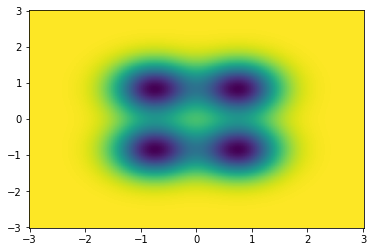

In [23]:
import matplotlib.pyplot as plt
from Hubbard_core import *
import numpy as np
from positify import positify

N = 20
R0 = np.array([3, 3, 7.2])
dvr = MLWF(N,
           R0=R0,
           lattice=np.array([2, 2], dtype=int),
           band=1,
           dim=3,
           avg=1 / 2,
           sparse=True,
           symmetry=True)

x = np.linspace(-dvr.R0[0] * 0.8, dvr.R0[0] * 0.8, 500)
X = np.meshgrid(x, x)
V = dvr.Vfun(*X, 0)

plt.pcolormesh(*X, V)

DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[20 20 20] is set.
DVR: R0=[3.  3.  7.2]w is set.
['x' 'y' 'z']-reflection symmetry is used.
param_set: trap parameter V0=104.52kHz w=1000nm
lattice: Full lattice sizes: [2 2 1]
lattice: lattice constants: [1.52 1.69 1.52]w
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[25 25 20] is set.
DVR: R0=[3.76  3.845 7.2  ]w is set.
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[20 20 20] is set.
DVR: R0=[3.  3.  7.2]w is set.
['x' 'y' 'z']-reflection symmetry is used.
param_set: trap parameter V0=104.52kHz w=1000nm
lattice: Full lattice sizes: [2 1 1]
lattice: lattice constants: [1.52 1.69 1.52]w
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[25 20 20] is set.
DVR: R0=[3.76 3.   7.2 ]w is set.


(-0.64, -0.62)

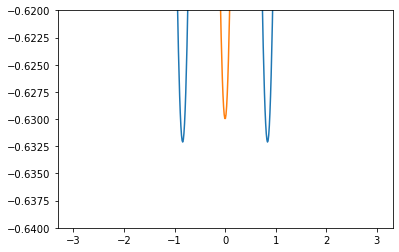

In [22]:
import matplotlib.pyplot as plt
from Hubbard_core import *
import numpy as np
from positify import positify

N = 20
R0 = np.array([3, 3, 7.2])
dvr = MLWF(N,
           R0=R0,
           lattice=np.array([2, 2], dtype=int),
           band=1,
           dim=3,
           avg=1 / 2,
           sparse=True,
           symmetry=True)

x = np.linspace(-dvr.R0[0] * 0.8, dvr.R0[0] * 0.8, 500)

V1 = dvr.Vfun(0, x, 0)
dvr = MLWF(N,
           R0=R0,
           lattice=np.array([2], dtype=int),
           band=1,
           dim=3,
           avg=1 / 2,
           sparse=True,
           symmetry=True)
V2 = dvr.Vfun(0, x, 0)

plt.plot(x, V1, x, V2)
plt.ylim([-0.64, -0.62])


DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[20 20 20] is set.
DVR: R0=[3.  3.  7.2]w is set.
['x' 'y' 'z']-reflection symmetry is used.
param_set: trap parameter V0=104.52kHz w=1000nm
lattice: Full lattice sizes: [2 1 1]
lattice: lattice constants: [1.52 1.69 1.52]w
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[25 20 20] is set.
DVR: R0=[3.76 3.   7.2 ]w is set.
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[20 20 20] is set.
DVR: R0=[3.  3.  7.2]w is set.
['x' 'y' 'z']-reflection symmetry is used.
param_set: trap parameter V0=104.52kHz w=1000nm
lattice: Full lattice sizes: [1 1 1]
lattice: lattice constants: [1.52 1.69 1.52]w
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[20 20 20] is set.
DVR: R0=[3.  3.  7.2]w is set.


(-1.02, -0.99)

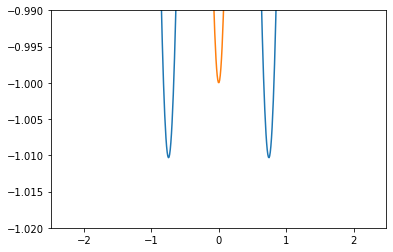

In [24]:
import matplotlib.pyplot as plt
from Hubbard_core import *
import numpy as np
from positify import positify

N = 20
R0 = np.array([3, 3, 7.2])
dvr = MLWF(N,
           R0=R0,
           lattice=np.array([2], dtype=int),
           band=1,
           dim=3,
           avg=1 / 2,
           sparse=True,
           symmetry=True)

x = np.linspace(-dvr.R0[0] * 0.6, dvr.R0[0] * 0.6, 500)

V1 = dvr.Vfun(x, 0, 0)
dvr = MLWF(N,
           R0=R0,
           lattice=np.array([1], dtype=int),
           band=1,
           dim=3,
           avg=1 / 2,
           sparse=True,
           symmetry=True)
V2 = dvr.Vfun(x, 0, 0)

plt.plot(x, V1, x, V2)
plt.ylim([-1.02, -0.99])

Why x and y direciton don't seem to affect each otehr? It is y direction is further. Since tunneling is very sensitive to spacing, this is quite reasonable. We find the effect of adding 2 wells along y direction is much smaller than adding along x direction. This is also convincing.

## n.n.n. tunneling 1D vs 2D array

In [58]:
from Hubbard_core import *
import numpy as np
from positify import positify
from scipy.stats import gmean

N = 20
R0 = np.array([3, 3, 7.2])
dvr = MLWF(N,
           R0=R0,
           lattice=np.array([2, 2], dtype=int),
           lc=(1520, 1520),
           dim=3,
           avg=1 / 2,
           sparse=True,
           symmetry=True)

E, W, parity = eigen_basis(dvr)

A, U = optimize(dvr, E, W, parity)
t_sb = np.array([])
for i in range(dvr.bands):
    mu = np.diag(A[i])  # Diagonals are mu_i
    t = -(A[i] - np.diag(mu))  # Off-diagonals are t_ij
    print(f'mu_i,{i+1} = ', np.real(mu))
    print(f't_ij,{i+1} =', abs(t))
    t_sb = np.append(t_sb, abs(t[0, 1]))
V = interaction(dvr, U, W, parity)
print('U_i =', abs(V))

DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[20 20 20] is set.
DVR: R0=[3.  3.  7.2]w is set.
['x' 'y' 'z']-reflection symmetry is used.
param_set: trap parameter V0=104.52kHz w=1000nm
lattice: dx is fixed at: [0.15 0.15 0.36]w
lattice: Full lattice sizes: [2 2 1]
lattice: lattice constants: [1.52 1.52 1.52]w
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[25 25 20] is set.
DVR: R0=[3.76 3.76 7.2 ]w is set.
H_op: n=[25 25 20] dx=[0.15 0.15 0.36]w p=[1 1 1] Gaussian sparse diagonalization is enabled. Lowest 4 states are to be calculated.
H_op: n=[25 25 20] dx=[0.15 0.15 0.36]w p=[1 1 1] Gaussian operator constructed.
H_solver: diagonalize sparse hermitian matrix.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.59s.
H_solver: eigenstates memory usage: 0.43 MiB.
H_op: n=[25 25 20] dx=[0.15 0.15 0.36]w p=[ 1 -1  1] Gaussian sparse diagonalization is enabled. Lowest 4 states are to be calculated.
H_op: n=[25 25 20] dx=[0.15 0.15 0.36]w p=[ 1 -1  1] Gaussian operator constructed.
H_solver: diago

### MLWF plots

/Users/nottforestfc/mambaforge/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


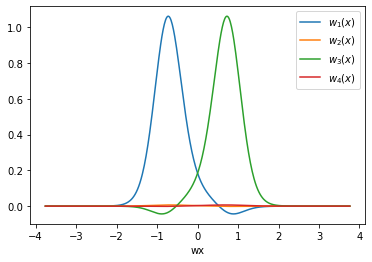

In [22]:
import matplotlib.pyplot as plt

mu = 0
k = dvr.Nsite
x = np.linspace(-dvr.R0[0], dvr.R0[0], 500)
y = np.array([-0.5])
z = np.array([0])
plt.plot(x,
         positify(
             wannier_func(dvr, W[mu], U[mu][:, :k], parity[mu],
                          [x, y, z]).reshape(-1, k)),
         label=tuple(f'$w_{i + 1}(x)$' for i in range(k)))
plt.xlabel('wx')
# plt.ylim([1E-2,3000])
# plt.yscale('log')
plt.legend()

/Users/nottforestfc/mambaforge/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


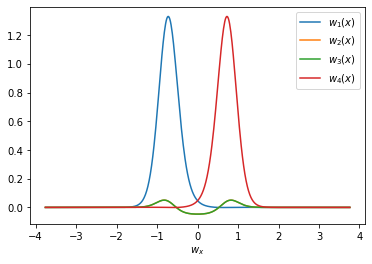

In [30]:
import matplotlib.pyplot as plt

mu = 0
k = dvr.Nsite
x = np.linspace(-dvr.R0[0], dvr.R0[0], 500)
y = np.array([0])
z = np.array([0])
plt.plot(x,
         positify(
             np.diagonal(
                 wannier_func(dvr, W[mu], U[mu][:, :k], parity[mu],
                              [x, x, z])).transpose(2, 0, 1).reshape(-1, k)),
         label=tuple(f'$w_{i + 1}(x)$' for i in range(k)))
plt.xlabel('$w_x$')
# plt.ylim([1E-2,3000])
# plt.yscale('log')
plt.legend()

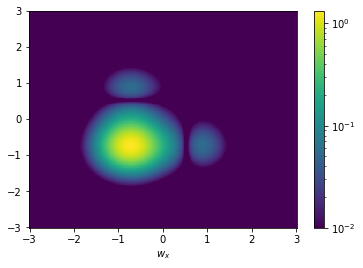

In [57]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors

mu = 0
k = 1

plt.xlabel('$w_x$')
x = np.linspace(-dvr.R0[0] * 0.8, dvr.R0[0] * 0.8, 500)
z = np.array([0])
X = np.meshgrid(x, x)
wf = abs(wannier_func(dvr, W[mu], U[mu][:, :k], parity[mu],
                      [x, x, z])).reshape(500, 500)
plt.pcolormesh(*X, wf, norm=colors.LogNorm(vmin=1E-2, vmax=wf.max()))
plt.colorbar()


In [13]:
import matplotlib.pyplot as plt

N = 20
R0 = np.array([3, 3, 7.2])
dvr = MLWF(N,
           R0=R0,
           lattice=np.array([3], dtype=int),
           lc=(1520, 1520),
           dim=3,
           avg=1 / 2,
           sparse=True,
           symmetry=True)
E, W, parity = eigen_basis(dvr)

A, U = optimize(dvr, E, W, parity)
t_sb = np.array([])
for i in range(dvr.bands):
    mu = np.diag(A[i])  # Diagonals are mu_i
    t = -(A[i] - np.diag(mu))  # Off-diagonals are t_ij
    print(f'mu_i,{i+1} = ', np.real(mu))
    print(f't_ij,{i+1} =', abs(t))
    t_sb = np.append(t_sb, abs(t[0, 1]))
V = interaction(dvr, U, W, parity)
print('U_i =', abs(V))

DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[20 20 20] is set.
DVR: R0=[3.  3.  7.2]w is set.
['x' 'y' 'z']-reflection symmetry is used.
param_set: trap parameter V0=104.52kHz w=1000nm
lattice: dx is fixed at: [0.15 0.15 0.36]w
lattice: Full lattice sizes: [3 1 1]
lattice: lattice constants: [1.52 1.52 1.52]w
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[30 20 20] is set.
DVR: R0=[4.52 3.   7.2 ]w is set.
H_op: n=[30 20 20] dx=[0.15 0.15 0.36]w p=[1 1 1] Gaussian sparse diagonalization is enabled. Lowest 3 states are to be calculated.
H_op: n=[30 20 20] dx=[0.15 0.15 0.36]w p=[1 1 1] Gaussian operator constructed.
H_solver: diagonalize sparse hermitian matrix.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.65s.
H_solver: eigenstates memory usage: 0.31 MiB.
H_op: n=[30 20 20] dx=[0.15 0.15 0.36]w p=[-1  1  1] Gaussian sparse diagonalization is enabled. Lowest 3 states are to be calculated.
H_op: n=[30 20 20] dx=[0.15 0.15 0.36]w p=[-1  1  1] Gaussian operator constructed.
H_solver: diago

/Users/nottforestfc/mambaforge/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


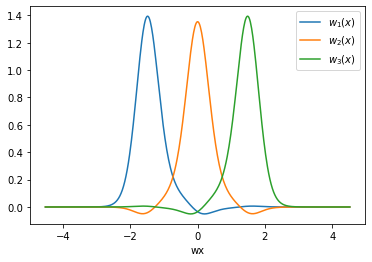

In [14]:
import matplotlib.pyplot as plt

mu = 0
k = dvr.Nsite
x = np.linspace(-dvr.R0[0], dvr.R0[0], 500)
y = np.array([0])
z = np.array([0])
plt.plot(x,
         positify(
             wannier_func(dvr, W[mu], U[mu][:, :k], parity[mu],
                          [x, y, z]).reshape(-1, k)),
         label=tuple(f'$w_{i + 1}(x)$' for i in range(k)))
plt.xlabel('$w_x$')
# plt.ylim([1E-2,3000])
# plt.yscale('log')
plt.legend()

One finds that for 2D, although the distance is smaller, the n.n.n. tunneling is in fact smaller, even though tunneling is monotonic with distance. This is due to the cross like structure of WFs we build.

### Deeper traps?

In [54]:
from Hubbard_core import *
import numpy as np
from positify import positify
from scipy.stats import gmean

N = 20
R0 = np.array([3, 3, 7.2])
dvr = MLWF(N,
           R0=R0,
           lattice=np.array([2, 2], dtype=int),
           lc=(1520, 1520),
           dim=3,
           avg=2,
           sparse=True,
           symmetry=True)

E, W, parity = eigen_basis(dvr)

A, U = optimize(dvr, E, W, parity)
t_sb = np.array([])
for i in range(dvr.bands):
    mu = np.diag(A[i])  # Diagonals are mu_i
    t = -(A[i] - np.diag(mu))  # Off-diagonals are t_ij
    print(f'mu_i,{i+1} = ', np.real(mu))
    print(f't_ij,{i+1} =', abs(t))
    t_sb = np.append(t_sb, abs(t[0, 1]))
V = interaction(dvr, U, W, parity)
print('U_i =', abs(V))

DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[20 20 20] is set.
DVR: R0=[3.  3.  7.2]w is set.
['x' 'y' 'z']-reflection symmetry is used.
param_set: trap parameter V0=104.52kHz w=1000nm
lattice: dx is fixed at: [0.15 0.15 0.36]w
lattice: Full lattice sizes: [2 2 1]
lattice: lattice constants: [1.52 1.52 1.52]w
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[25 25 20] is set.
DVR: R0=[3.76 3.76 7.2 ]w is set.
H_op: n=[25 25 20] dx=[0.15 0.15 0.36]w p=[1 1 1] Gaussian sparse diagonalization is enabled. Lowest 4 states are to be calculated.
H_op: n=[25 25 20] dx=[0.15 0.15 0.36]w p=[1 1 1] Gaussian operator constructed.
H_solver: diagonalize sparse hermitian matrix.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.42s.
H_solver: eigenstates memory usage: 0.43 MiB.
H_op: n=[25 25 20] dx=[0.15 0.15 0.36]w p=[ 1 -1  1] Gaussian sparse diagonalization is enabled. Lowest 4 states are to be calculated.
H_op: n=[25 25 20] dx=[0.15 0.15 0.36]w p=[ 1 -1  1] Gaussian operator constructed.
H_solver: diago

In [55]:
import matplotlib.pyplot as plt

N = 20
R0 = np.array([3, 3, 7.2])
dvr = MLWF(N,
           R0=R0,
           lattice=np.array([3], dtype=int),
           lc=(1520, 1520),
           dim=3,
           avg=2,
           sparse=True,
           symmetry=True)
E, W, parity = eigen_basis(dvr)

A, U = optimize(dvr, E, W, parity)
t_sb = np.array([])
for i in range(dvr.bands):
    mu = np.diag(A[i])  # Diagonals are mu_i
    t = -(A[i] - np.diag(mu))  # Off-diagonals are t_ij
    print(f'mu_i,{i+1} = ', np.real(mu))
    print(f't_ij,{i+1} =', abs(t))
    t_sb = np.append(t_sb, abs(t[0, 1]))
V = interaction(dvr, U, W, parity)
print('U_i =', abs(V))

DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[20 20 20] is set.
DVR: R0=[3.  3.  7.2]w is set.
['x' 'y' 'z']-reflection symmetry is used.
param_set: trap parameter V0=104.52kHz w=1000nm
lattice: dx is fixed at: [0.15 0.15 0.36]w
lattice: Full lattice sizes: [3 1 1]
lattice: lattice constants: [1.52 1.52 1.52]w
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[30 20 20] is set.
DVR: R0=[4.52 3.   7.2 ]w is set.
H_op: n=[30 20 20] dx=[0.15 0.15 0.36]w p=[1 1 1] Gaussian sparse diagonalization is enabled. Lowest 3 states are to be calculated.
H_op: n=[30 20 20] dx=[0.15 0.15 0.36]w p=[1 1 1] Gaussian operator constructed.
H_solver: diagonalize sparse hermitian matrix.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.32s.
H_solver: eigenstates memory usage: 0.31 MiB.
H_op: n=[30 20 20] dx=[0.15 0.15 0.36]w p=[-1  1  1] Gaussian sparse diagonalization is enabled. Lowest 3 states are to be calculated.
H_op: n=[30 20 20] dx=[0.15 0.15 0.36]w p=[-1  1  1] Gaussian operator constructed.
H_solver: diago

Deeper plots indeed reduce the ratio of n.n.n. tunneling in 1D chain to 2D diagonal.

## Reproduce 1D 8-site chain lattice

### Elliptic tweezers

DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[20 20 20] is set.
DVR: R0=[3.  3.  7.2]w is set.
['x' 'y' 'z']-reflection symmetry is used.
param_set: trap parameter V0=50kHz w=[930, 1250]nm
lattice: Full lattice sizes: [1 1 1]
lattice: lattice constants: [1.4516129  1.61290323 1.4516129 ]w
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[20 20 20] is set.
DVR: R0=[3.  3.  7.2]w is set.


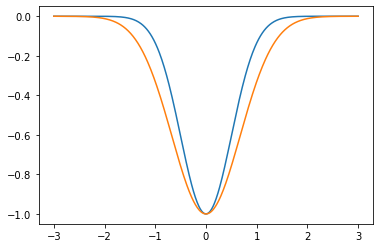

In [29]:
import matplotlib.pyplot as plt

N = 20
R0 = np.array([3, 3, 7.2])
dvr = MLWF(N,
           R0=R0,
           lattice=np.array([1], dtype=int),
           lc=(1350, 1500),
           trap=(50, [930, 1250]),
           laser=770,
           dim=3,
           avg=1,
           sparse=True,
           symmetry=True)
x = np.linspace(-dvr.R0[0], dvr.R0[0], 500)
V1 = dvr.Vfun(x, 0, 0)
V2 = dvr.Vfun(0, x, 0)

plt.plot(x, V1)
plt.plot(x, V2)

In [3]:
from Hubbard_core import *
import numpy as np
from positify import positify
from scipy.stats import gmean

N = 20
R0 = np.array([3, 3, 7.2])
dvr = MLWF(N,
           R0=R0,
           lattice=np.array([8], dtype=int),
           lc=(1350, 1500),
           trap=(50, [930, 1250]),
           laser=770,
           dim=3,
           avg=1,
           sparse=True,
           symmetry=True)

E, W, parity = eigen_basis(dvr)

A, U = optimize(dvr, E, W, parity)
t_sb = np.array([])
for i in range(dvr.bands):
    mu = np.diag(A[i])  # Diagonals are mu_i
    t = -(A[i] - np.diag(mu))  # Off-diagonals are t_ij
    print(f'mu_i,{i+1} = ', np.real(mu))
    print(f't_ij,{i+1} =', abs(t))
    t_sb = np.append(t_sb, abs(t[0, 1]))
V = interaction(dvr, U, W, parity)
print('U_i =', abs(V))

DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[20 20 20] is set.
DVR: R0=[3.  3.  7.2]w is set.
['x' 'y' 'z']-reflection symmetry is used.
param_set: trap parameter V0=50kHz w=[930, 1250]nm
lattice: dx is fixed at: [0.15 0.15 0.36]w
lattice: Full lattice sizes: [8 1 1]
lattice: lattice constants: [1.4516129  1.61290323 1.4516129 ]w
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[53 20 20] is set.
DVR: R0=[8.08064516 3.         7.2       ]w is set.
H_op: n=[53 20 20] dx=[0.15 0.15 0.36]w p=[1 1 1] Gaussian sparse diagonalization is enabled. Lowest 8 states are to be calculated.
H_op: n=[53 20 20] dx=[0.15 0.15 0.36]w p=[1 1 1] Gaussian operator constructed.
H_solver: diagonalize sparse hermitian matrix.
H_solver: Gaussian Hamiltonian solved. Time spent: 1.36s.
H_solver: eigenstates memory usage: 1.45 MiB.
H_op: n=[53 20 20] dx=[0.15 0.15 0.36]w p=[-1  1  1] Gaussian sparse diagonalization is enabled. Lowest 8 states are to be calculated.
H_op: n=[53 20 20] dx=[0.15 0.15 0.36]w p=[-1  1  1] Gaussia

Using exp't tweezer parameters makes results nowhere close to exp't claims.

/Users/nottforestfc/mambaforge/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


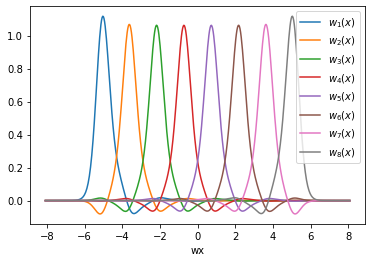

In [25]:
import matplotlib.pyplot as plt

mu = 0
k = dvr.Nsite
x = np.linspace(-dvr.R0[0], dvr.R0[0], 500)
y = np.array([0])
z = np.array([0])
plt.plot(x,
         positify(
             wannier_func(dvr, W[mu], U[mu][:, :k], parity[mu],
                          [x, y, z]).reshape(-1, k)),
         label=tuple(f'$w_{i + 1}(x)$' for i in range(k)))
plt.xlabel('wx')
# plt.ylim([1E-2,3000])
# plt.yscale('log')
plt.legend()

In [ ]:
import matplotlib.pyplot as plt

x = np.linspace(-dvr.R0[0] * .8, dvr.R0[0] * .8, 500)
V = dvr.Vfun(x, 0, 0) * dvr.V0 / dvr.kHz_2p

plt.plot(x, V)

### Circular tweezers with waist $w_x$

In [ ]:
from Hubbard_core import *
import numpy as np
from positify import positify
from scipy.stats import gmean

N = 20
R0 = np.array([3, 3, 7.2])
dvr = MLWF(N,
           R0=R0,
           lattice=np.array([8], dtype=int),
           lc=(1600, 1520),
           trap=(42, 930),
           laser=770,
           dim=3,
           avg=1,
           sparse=True,
           symmetry=True)

E, W, parity = eigen_basis(dvr)

A, U = optimize(dvr, E, W, parity)
t_sb = np.array([])
for i in range(dvr.bands):
    mu = np.diag(A[i])  # Diagonals are mu_i
    t = -(A[i] - np.diag(mu))  # Off-diagonals are t_ij
    print(f'mu_i,{i+1} = ', np.real(mu))
    print(f't_ij,{i+1} =', abs(t))
    t_sb = np.append(t_sb, abs(t[0, 1]))
V = interaction(dvr, U, W, parity)
print('U_i =', abs(V))

DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[20 20 20] is set.
DVR: R0=[3.  3.  7.2]w is set.
['x' 'y' 'z']-reflection symmetry is used.
param_set: trap parameter V0=42kHz w=930nm
lattice: Full lattice sizes: [8 1 1]
lattice: lattice constants: [1.72043011 1.6344086  1.72043011]w
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[60 20 20] is set.
DVR: R0=[9.02150538 3.         7.2       ]w is set.
H_op: n=[60 20 20] dx=[0.15 0.15 0.36]w p=[1 1 1] Gaussian sparse diagonalization is enabled. Lowest 8 states are to be calculated.
H_op: n=[60 20 20] dx=[0.15 0.15 0.36]w p=[1 1 1] Gaussian operator constructed.
H_solver: diagonalize sparse hermitian matrix.
H_solver: Gaussian Hamiltonian solved. Time spent: 1.42s.
H_solver: eigenstates memory usage: 1.64 MiB.
H_op: n=[60 20 20] dx=[0.15 0.15 0.36]w p=[-1  1  1] Gaussian sparse diagonalization is enabled. Lowest 8 states are to be calculated.
H_op: n=[60 20 20] dx=[0.15 0.15 0.36]w p=[-1  1  1] Gaussian operator constructed.
H_solver: diagonalize spars

/Users/nottforestfc/mambaforge/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


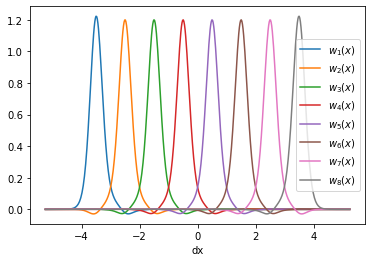

In [ ]:
import matplotlib.pyplot as plt

mu = 0
k = dvr.Nsite
x = np.linspace(-dvr.R0[0], dvr.R0[0], 500)
y = np.array([0])
z = np.array([0])
plt.plot(x / dvr.lc[0],
         positify(
             wannier_func(dvr, W[mu], U[mu][:, :k], parity[mu],
                          [x, y, z]).reshape(-1, k)),
         label=tuple(f'$w_{i + 1}(x)$' for i in range(k)))
plt.xlabel('dx')
# plt.ylim([1E-2,3000])
# plt.yscale('log')
plt.legend()

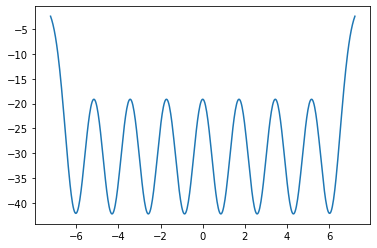

In [ ]:
import matplotlib.pyplot as plt

x = np.linspace(-dvr.R0[0] * .8, dvr.R0[0] * .8, 500)
V = dvr.Vfun(x, 0, 0) * dvr.V0 / dvr.kHz_2p

plt.plot(x, V)

In [2]:
from Hubbard_core import *
import numpy as np
from positify import positify
from scipy.stats import gmean

N = 20
R0 = np.array([3, 3, 7.2])
dvr = MLWF(N,
           R0=R0,
           lattice=np.array([8], dtype=int),
           lc=(1350, 1500),
           trap=(50, 930),
           laser=770,
           dim=3,
           avg=1,
           sparse=True,
           symmetry=True)

E, W, parity = eigen_basis(dvr)

A, U = optimize(dvr, E, W, parity)
t_sb = np.array([])
for i in range(dvr.bands):
    mu = np.diag(A[i])  # Diagonals are mu_i
    t = -(A[i] - np.diag(mu))  # Off-diagonals are t_ij
    print(f'mu_i,{i+1} = ', np.real(mu))
    print(f't_ij,{i+1} =', abs(t))
    t_sb = np.append(t_sb, abs(t[0, 1]))
V = interaction(dvr, U, W, parity)
print('U_i =', abs(V))

DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[20 20 20] is set.
DVR: R0=[3.  3.  7.2]w is set.
['x' 'y' 'z']-reflection symmetry is used.
param_set: trap parameter V0=50kHz w=930nm
lattice: Full lattice sizes: [8 1 1]
lattice: lattice constants: [1.4516129  1.61290323 1.4516129 ]w
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[53 20 20] is set.
DVR: R0=[8.08064516 3.         7.2       ]w is set.
H_op: n=[53 20 20] dx=[0.15 0.15 0.36]w p=[1 1 1] Gaussian sparse diagonalization is enabled. Lowest 8 states are to be calculated.
H_op: n=[53 20 20] dx=[0.15 0.15 0.36]w p=[1 1 1] Gaussian operator constructed.
H_solver: diagonalize sparse hermitian matrix.
H_solver: Gaussian Hamiltonian solved. Time spent: 1.22s.
H_solver: eigenstates memory usage: 1.45 MiB.
H_op: n=[53 20 20] dx=[0.15 0.15 0.36]w p=[-1  1  1] Gaussian sparse diagonalization is enabled. Lowest 8 states are to be calculated.
H_op: n=[53 20 20] dx=[0.15 0.15 0.36]w p=[-1  1  1] Gaussian operator constructed.
H_solver: diagonalize spars

/Users/nottforestfc/mambaforge/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


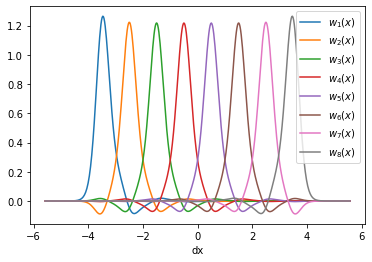

In [8]:
import matplotlib.pyplot as plt

mu = 0
k = dvr.Nsite
x = np.linspace(-dvr.R0[0], dvr.R0[0], 500)
y = np.array([0])
z = np.array([0])
plt.plot(x / dvr.lc[0],
         positify(
             wannier_func(dvr, W[mu], U[mu][:, :k], parity[mu],
                          [x, y, z]).reshape(-1, k)),
         label=tuple(f'$w_{i + 1}(x)$' for i in range(k)))
plt.xlabel('dx')
# plt.ylim([1E-2,3000])
# plt.yscale('log')
plt.legend()

The onsite ineraction is rather close, but the tunneling is much much larger than exp't estimation. As we can see, the traps are pretty close, which results in a giant overlap between Wannier funcitons.